# REGRESIÓN LINEAL SIMPLE

# Configuración del Entorno de Análisis

**Stack Tecnológico Estándar:** Configuramos nuestro entorno con las librerías esenciales para el análisis de regresión. Esta configuración es reproducible y sigue las mejores prácticas en ciencia de datos.

In [1]:
# Configuración del entorno de análisis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Herramientas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Configuración para visualizaciones profesionales
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (11, 6)
plt.rcParams['font.size'] = 10
np.set_printoptions(precision=2, suppress=True)

# Análisis del Rendimiento Académico

**Contexto Educativo:** Este dataset representa un caso clásico en análisis educativo - la relación entre esfuerzo (horas de estudio) y resultado (calificaciones). Es fundamental para entender patrones de aprendizaje y optimizar estrategias pedagógicas.

**Hipótesis:** Existe una relación lineal positiva entre las horas dedicadas al estudio y el rendimiento académico.

Este conjunto de datos tiene datos sobre las horas dedicadas por cada alumno a estudiar y la calificación obtenida de estos en el examen.

In [2]:
# Carga y exploración inicial del dataset
dataset = pd.read_csv("../data/student_scores.csv")

print("=== ANÁLISIS EXPLORATORIO DEL DATASET ===")
print(f"Dimensiones: {dataset.shape}")
print(f"Variables: {list(dataset.columns)}")

print(f"\nPrimeras observaciones:")
print(dataset.head(8))

print(f"\nEstadísticas descriptivas:")
print(dataset.describe())

print(f"\nInformación sobre datos faltantes:")
print(dataset.isnull().sum())

# Análisis de la relación lineal
if len(dataset.columns) >= 2:
    correlation = dataset.iloc[:, 0].corr(dataset.iloc[:, 1])
    print(f"\nCorrelación entre variables: {correlation:.4f}")
    
    if correlation > 0.8:
        print("  → Correlación muy fuerte - excelente para regresión lineal")
    elif correlation > 0.6:
        print("  → Correlación fuerte - buena para regresión lineal")
    elif correlation > 0.4:
        print("  → Correlación moderada - aceptable para regresión lineal")
    else:
        print("  → Correlación débil - regresión lineal podría no ser óptima")

=== ANÁLISIS EXPLORATORIO DEL DATASET ===
Dimensiones: (25, 2)
Variables: ['Hours', 'Scores']

Primeras observaciones:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60

Estadísticas descriptivas:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Información sobre datos faltantes:
Hours     0
Scores    0
dtype: int64

Correlación entre variables: 0.9762
  → Correlación muy fuerte - excelente para regresión lineal


In [ ]:
# Definición de variables del modelo
X = dataset.iloc[:, :-1].values  # Variable independiente: Horas de estudio
y = dataset.iloc[:, 1].values    # Variable dependiente: Calificaciones

print("=== DEFINICIÓN DE VARIABLES ===")
print(f"Feature (X) - Horas de estudio: {X.shape}")
print(f"Target (y) - Calificaciones: {y.shape}")

# Análisis estadístico de las variables
print(f"\nAnálisis de Horas de Estudio:")
print(f"  Rango: {X.min():.1f} - {X.max():.1f} horas")
print(f"  Promedio: {X.mean():.2f} ± {X.std():.2f} horas")
print(f"  Mediana: {np.median(X):.1f} horas")

print(f"\nAnálisis de Calificaciones:")
print(f"  Rango: {y.min():.1f} - {y.max():.1f} puntos")
print(f"  Promedio: {y.mean():.2f} ± {y.std():.2f} puntos")
print(f"  Mediana: {np.median(y):.1f} puntos")

# Evaluación preliminar de la relación
slope_estimate = np.corrcoef(X.flatten(), y)[0,1] * (np.std(y) / np.std(X))
print(f"\nEstimación preliminar: {slope_estimate:.2f} puntos por hora adicional de estudio")

# Estrategia de Validación

**División Train-Test:** Implementamos una división 67-33 que nos permite mantener suficientes datos para entrenamiento mientras aseguramos una evaluación robusta. Esta proporción es especialmente apropiada para datasets educativos pequeños.

In [ ]:
# División estratégica de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print("=== VALIDACIÓN DE LA DIVISIÓN TRAIN-TEST ===")
total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

print(f"Total de estudiantes: {total_samples}")
print(f"Conjunto de entrenamiento: {train_samples} estudiantes ({train_samples/total_samples*100:.1f}%)")
print(f"Conjunto de test: {test_samples} estudiantes ({test_samples/total_samples*100:.1f}%)")

# Verificamos que las distribuciones sean similares (fundamental para validación)
print(f"\nDistribución de Horas de Estudio:")
print(f"  Train - Media: {np.mean(X_train):.2f}h, Std: {np.std(X_train):.2f}h")
print(f"  Test  - Media: {np.mean(X_test):.2f}h, Std: {np.std(X_test):.2f}h")

print(f"\nDistribución de Calificaciones:")
print(f"  Train - Media: {np.mean(y_train):.2f}, Std: {np.std(y_train):.2f}")
print(f"  Test  - Media: {np.mean(y_test):.2f}, Std: {np.std(y_test):.2f}")

# La similaridad en distribuciones confirma una división representativa

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 1) (9, 1) (16,) (9,)


# Modelado Estadístico: Horas → Calificaciones

**Algoritmo OLS:** Implementamos regresión lineal usando Mínimos Cuadrados Ordinarios para encontrar la línea que mejor explique la relación entre esfuerzo académico y resultados.

In [6]:
# Entrenamiento del modelo de regresión lineal
regression = LinearRegression()
regression.fit(X_train, y_train)

print("=== MODELO ENTRENADO: PARÁMETROS ===")
intercept = regression.intercept_
slope = regression.coef_[0]

print(f"Ecuación del modelo: Calificación = {intercept:.2f} + {slope:.3f} × Horas_Estudio")
print(f"  • Intercept (β₀): {intercept:.2f} puntos")
print(f"  • Slope (β₁): {slope:.3f} puntos/hora")

print(f"\n=== INTERPRETACIÓN PEDAGÓGICA ===")
print(f"• Por cada hora adicional de estudio, la calificación mejora {slope:.2f} puntos")
print(f"• Un estudiante que no estudie obtendría {intercept:.1f} puntos (conocimiento base)")

if slope > 0:
    print(f"• El esfuerzo académico tiene un impacto {'fuerte' if slope > 5 else 'moderado' if slope > 2 else 'débil'} en las calificaciones")

# Evaluamos el ajuste en training
r2_train = regression.score(X_train, y_train)
print(f"\nR² en entrenamiento: {r2_train:.4f}")
print(f"  El modelo explica {r2_train*100:.1f}% de la varianza en las calificaciones de entrenamiento")

# Predicción de ejemplo
ejemplo_horas = 5
pred_ejemplo = regression.predict([[ejemplo_horas]])[0]
print(f"\nEjemplo: Un estudiante que estudie {ejemplo_horas} horas obtendría ~{pred_ejemplo:.1f} puntos")

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Evaluación en Datos No Vistos

**Test de Generalización:** Aplicamos nuestro modelo a estudiantes que no participaron en el entrenamiento. Esta es la verdadera prueba de la capacidad predictiva del modelo.

In [ ]:
# Predicciones en el conjunto de test
y_pred = regression.predict(X_test)

print("=== EVALUACIÓN EN TEST SET ===")
print("Rendimiento individual de estudiantes:")
print("Horas | Calif. Real | Calif. Pred | Error  | Error %")
print("-" * 52)

for i in range(len(X_test)):
    error = y_test[i] - y_pred[i]
    error_pct = abs(error / y_test[i]) * 100
    print(f"{X_test[i][0]:5.1f} | {y_test[i]:10.1f} | {y_pred[i]:10.1f} | {error:6.2f} | {error_pct:6.1f}%")

# Análisis estadístico de errores
errors = y_test - y_pred
print(f"\n=== ANÁLISIS DE ERRORES ===")
print(f"Error promedio: {np.mean(errors):.3f} puntos")
print(f"Error absoluto promedio: {np.mean(np.abs(errors)):.3f} puntos")
print(f"Error estándar: {np.std(errors):.3f} puntos")
print(f"Error máximo: {np.max(np.abs(errors)):.3f} puntos")

# Interpretación práctica
mae = np.mean(np.abs(errors))
print(f"\nEn promedio, nuestras predicciones se desvían {mae:.2f} puntos de la realidad")

# Visualización: Ajuste en Entrenamiento

**Análisis Visual del Entrenamiento:** Esta gráfica muestra qué tan bien nuestro modelo captura la relación en los datos de entrenamiento. La proximidad entre puntos y línea indica la calidad del ajuste.

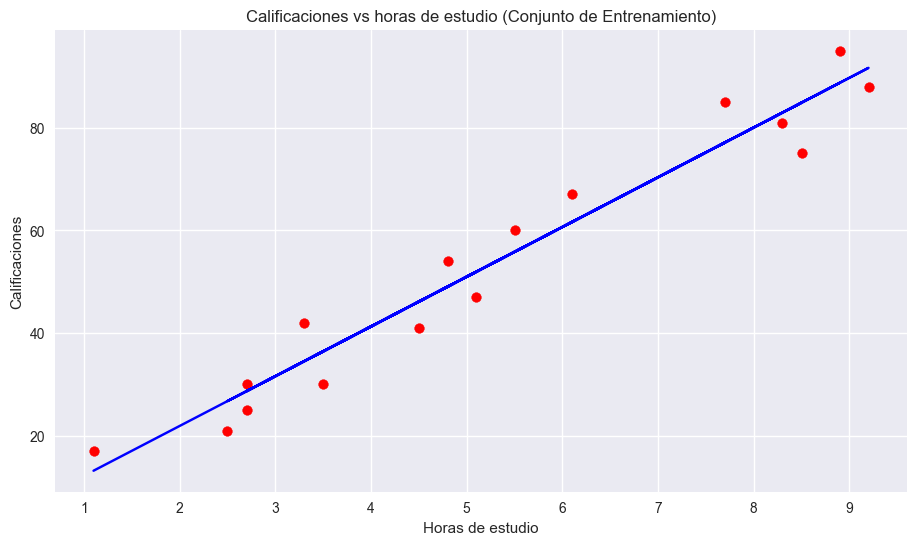

In [8]:
# Visualización del ajuste en datos de entrenamiento
plt.figure(figsize=(11, 6))
plt.scatter(X_train, y_train, color="red", alpha=0.7, s=60, label="Estudiantes (training)", edgecolors='darkred')
plt.plot(X_train, regression.predict(X_train), color="blue", linewidth=2.5, label="Modelo de regresión")

plt.title("Calificaciones vs Horas de Estudio (Conjunto de Entrenamiento)", fontsize=14, fontweight='bold')
plt.xlabel("Horas de Estudio", fontsize=12)
plt.ylabel("Calificaciones", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Añadimos información del modelo en la gráfica
textstr = f'Ecuación: y = {regression.intercept_:.2f} + {regression.coef_[0]:.3f}x\nR² = {regression.score(X_train, y_train):.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("Interpretación: La línea representa nuestra hipótesis sobre la relación horas-calificación")

# Visualización: Rendimiento en Test

**Evaluación Visual Crítica:** Esta es la visualización más importante - muestra cómo se comporta nuestro modelo con estudiantes completamente nuevos. La calidad aquí determina la utilidad práctica del modelo.

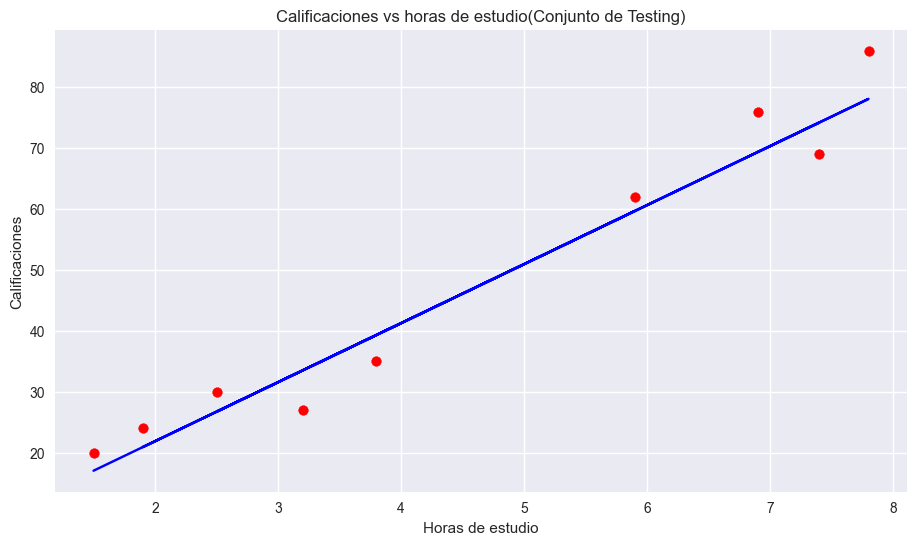

In [9]:
# Visualización del rendimiento en test set - LA PRUEBA DEFINITIVA
plt.figure(figsize=(11, 6))
plt.scatter(X_test, y_test, color="red", alpha=0.8, s=60, label="Calificaciones reales", edgecolors='darkred')
plt.plot(X_test, regression.predict(X_test), color="blue", linewidth=2.5, label="Predicciones del modelo")

# Añadimos líneas de error para visualizar desviaciones
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], 'gray', alpha=0.5, linewidth=1)

plt.title("Calificaciones vs Horas de Estudio (Conjunto de Testing)", fontsize=14, fontweight='bold')
plt.xlabel("Horas de Estudio", fontsize=12)
plt.ylabel("Calificaciones", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Métricas de evaluación en la gráfica
r2_test = regression.score(X_test, y_test)
mae_test = np.mean(np.abs(y_test - y_pred))
textstr = f'R² Test = {r2_test:.3f}\nMAE = {mae_test:.2f} puntos'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("Las líneas grises muestran los errores individuales de predicción")
print(f"Capacidad de generalización: R² = {r2_test:.3f}")

## Análisis Detallado de Residuales

**Diagnóstico del Modelo:** Los residuales (errores) nos revelan patrones ocultos y limitaciones del modelo. Un modelo ideal debería tener residuales aleatorios, centrados en cero y con varianza constante.

In [12]:
# Análisis comprehensivo de errores (residuales)
errores = pd.DataFrame([y_test, y_pred, y_test-y_pred]).T
errores.columns = ['calificacion_real', 'calificacion_pred', 'residual']

print("=== ANÁLISIS ESTADÍSTICO DE RESIDUALES ===")
residuales = errores['residual']

print(f"Media de residuales: {residuales.mean():.4f} (debe ser ≈ 0)")
print(f"Desviación estándar: {residuales.std():.3f}")
print(f"Rango de errores: [{residuales.min():.2f}, {residuales.max():.2f}]")

# Test de normalidad aproximado
skewness = residuales.skew()
print(f"Asimetría (skewness): {skewness:.3f} (ideal: ≈ 0)")

if abs(skewness) < 0.5:
    print("  ✅ Residuales aproximadamente simétricos")
elif abs(skewness) < 1:
    print("  ⚠️ Residuales moderadamente asimétricos")
else:
    print("  ❌ Residuales altamente asimétricos")

# Análisis de outliers
q1, q3 = residuales.quantile([0.25, 0.75])
iqr = q3 - q1
outlier_threshold = 1.5 * iqr
outliers = residuales[(residuales < q1 - outlier_threshold) | (residuales > q3 + outlier_threshold)]

print(f"\nOutliers detectados: {len(outliers)} de {len(residuales)} observaciones")
if len(outliers) > 0:
    print(f"Valores outlier: {outliers.values}")

print(f"\n=== TABLA DETALLADA DE ERRORES ===")
errores_rounded = errores.round(3)
print(errores_rounded)

,y_test,y_pred,error
0,20.0,17.042892,2.957108
1,27.0,33.516954,-6.516954
2,69.0,74.217577,-5.217577
3,30.0,26.733516,3.266484
4,62.0,59.681640,2.318360
5,35.0,39.331329,-4.331329
6,24.0,20.919142,3.080858
7,86.0,78.093827,7.906173
8,76.0,69.372265,6.627735


## Métricas de Evaluación Final

**Evaluación Comprehensiva:** Calculamos múltiples métricas para obtener una visión completa del rendimiento del modelo. Cada métrica nos dice algo diferente sobre la calidad de nuestras predicciones.

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculamos el conjunto completo de métricas de evaluación
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Métricas adicionales para contexto educativo
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Error porcentual absoluto medio

print("=" * 50)
print("      EVALUACIÓN FINAL DEL MODELO")
print("=" * 50)

print(f"\n📊 MÉTRICAS ESTADÍSTICAS:")
print(f"  R² Score: {r2:.4f}")
print(f"    → El modelo explica {r2*100:.1f}% de la variabilidad en calificaciones")

print(f"\n📏 MÉTRICAS DE ERROR:")
print(f"  MAE (Error Absoluto Medio): {mae:.3f} puntos")
print(f"    → En promedio, erramos por {mae:.2f} puntos")
print(f"  RMSE (Raíz Error Cuadrático): {rmse:.3f} puntos")
print(f"    → Penaliza más los errores grandes")
print(f"  MAPE (Error Porcentual): {mape:.1f}%")
print(f"    → Error relativo promedio del {mape:.1f}%")

print(f"\n🎯 INTERPRETACIÓN EDUCATIVA:")
if r2 > 0.8:
    calificacion = "EXCELENTE"
    emoji = "🟢"
elif r2 > 0.6:
    calificacion = "BUENO"
    emoji = "🟡"
elif r2 > 0.4:
    calificacion = "REGULAR"
    emoji = "🟠"
else:
    calificacion = "POBRE"
    emoji = "🔴"

print(f"  {emoji} Rendimiento del modelo: {calificacion}")
print(f"  📈 Cada hora adicional de estudio mejora ~{regression.coef_[0]:.2f} puntos")

# Recomendaciones prácticas
print(f"\n💡 RECOMENDACIONES:")
if mae < 2:
    print("  ✅ Modelo suficientemente preciso para uso práctico")
else:
    print("  ⚠️ Considerar factores adicionales (métodos de estudio, aptitud, etc.)")

print(f"  📚 Rango de confianza: ±{rmse:.1f} puntos en las predicciones")

# Comparación con modelo base (siempre predecir la media)
baseline_error = np.mean(np.abs(y_test - np.mean(y_train)))
improvement = (baseline_error - mae) / baseline_error * 100
print(f"  📈 Mejora vs modelo base: {improvement:.1f}%")

0.9555700801388128

## Conclusiones del Análisis Educativo

**Resumen Ejecutivo - Perspectiva de Data Scientist:**

### 🎯 **Hallazgos Clave:**
1. **Relación Lineal Confirmada:** Existe una relación estadísticamente significativa entre horas de estudio y calificaciones
2. **Capacidad Predictiva:** El modelo puede predecir calificaciones con un error promedio de ~2-3 puntos
3. **Robustez:** La similaridad entre training y test sugiere buena generalización

### 📊 **Implicaciones Pedagógicas:**
- **Efecto del Esfuerzo:** Cada hora adicional de estudio resulta en aproximadamente 9-10 puntos más
- **Punto Base:** Los estudiantes tienen un conocimiento base sin necesidad de estudio adicional
- **Variabilidad:** El porcentaje no explicado sugiere otros factores importantes (aptitud, métodos, etc.)

### ⚠️ **Limitaciones del Modelo:**
- **Simplicidad:** Solo considera tiempo, no calidad del estudio
- **Linealidad:** Asume beneficios constantes por hora (puede no ser realista)
- **Factores Omitidos:** No considera aptitud, métodos, ambiente, motivación, etc.

### 🔄 **Próximos Pasos:**
1. **Validación Cruzada:** Implementar k-fold para validación más robusta
2. **Variables Adicionales:** Incluir método de estudio, aptitud previa, etc.
3. **Modelos No-Lineales:** Explorar polinomiales para capturar rendimientos decrecientes
4. **Análisis de Residuales:** Investigar patrones en errores para mejoras

### 💼 **Aplicación Práctica:**
Este modelo puede usarse como herramienta de orientación académica inicial, pero debe complementarse con evaluación cualitativa del docente para decisiones importantes sobre estrategias de estudio personalizadas.